In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as ply
import seaborn as sns

In [3]:
df = pd.read_csv("blinkit_data.csv")

In [4]:
df.head(11)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


In [5]:
print("size of data ",df.shape)

size of data  (8523, 12)


In [6]:
df.describe

<bound method NDFrame.describe of      Item Fat Content Item Identifier              Item Type  \
0             Regular           FDX32  Fruits and Vegetables   
1             Low Fat           NCB42     Health and Hygiene   
2             Regular           FDR28           Frozen Foods   
3             Regular           FDL50                 Canned   
4             Low Fat           DRI25            Soft Drinks   
...               ...             ...                    ...   
8518          low fat           NCT53     Health and Hygiene   
8519          low fat           FDN09            Snack Foods   
8520          low fat           DRE13            Soft Drinks   
8521              reg           FDT50                  Dairy   
8522              reg           FDM58            Snack Foods   

      Outlet Establishment Year Outlet Identifier Outlet Location Type  \
0                          2012            OUT049               Tier 1   
1                          2022            OUT018

In [7]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [8]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

In [9]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [10]:
df['Item Fat Content']=df['Item Fat Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [11]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


In [12]:
total_sales = df['Sales'].sum()

avg_sales = df['Sales'].mean()

no_of_item_sold = df['Sales'].count()

avg_rating = df['Rating'].mean()

print(f"total sales : ${total_sales:,.1f}")
print(f"avg sales : ${avg_sales:,.1f}")
print(f"no of item sold : {no_of_item_sold:,.1f}")
print(f"avg rating : {avg_rating:,.1f}")

total sales : $1,201,681.5
avg sales : $141.0
no of item sold : 8,523.0
avg rating : 4.0


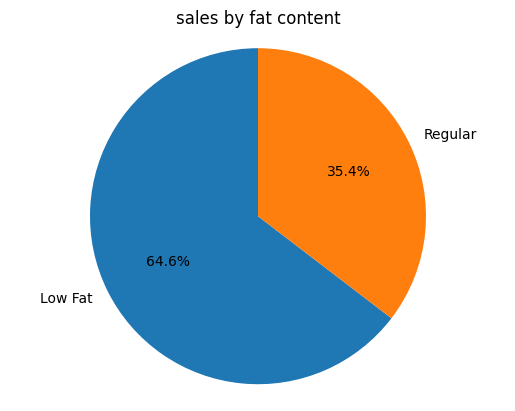

In [13]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

ply.pie(sales_by_fat, labels = sales_by_fat.index, autopct = '%.1f%%', startangle = 90)
ply.title('sales by fat content')
ply.axis('equal')
ply.show()

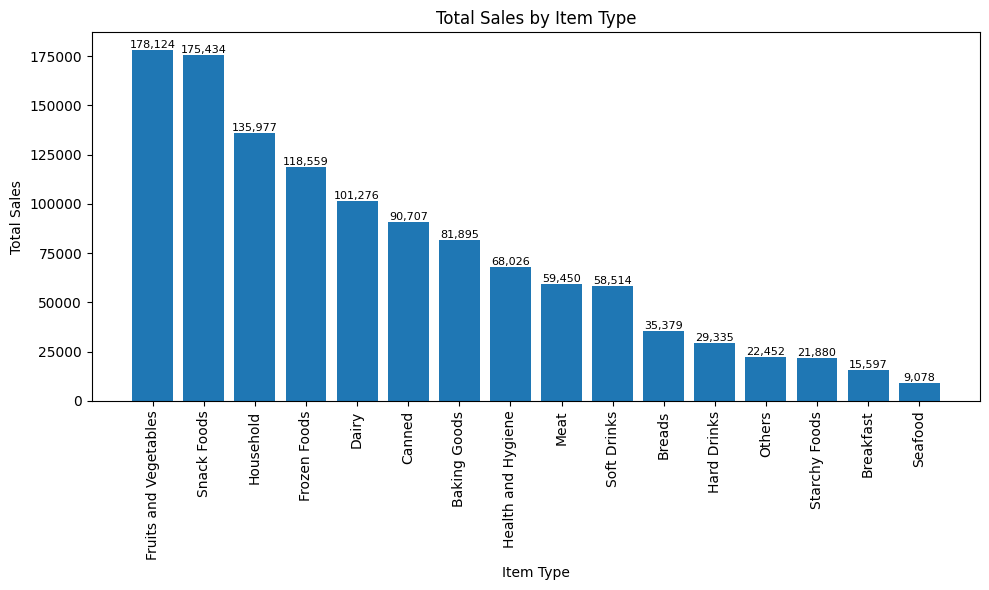

In [20]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
ply.figure(figsize=(10,6))
bars = ply.bar(sales_by_type.index, sales_by_type.values)
ply.xticks(rotation=90)
ply.xlabel('Item Type')
ply.ylabel('Total Sales')
ply.title('Total Sales by Item Type')

for bar in bars:
    ply.text(bar.get_x() + bar.get_width() / 2 , bar.get_height(), f'{bar.get_height():,.0f}', ha = 'center' , va = 'bottom',
              fontsize = 8)
ply.tight_layout()
ply.show()


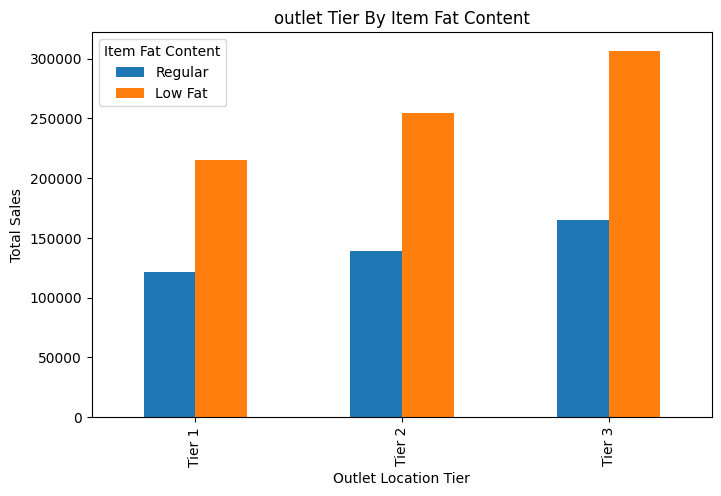

In [22]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular','Low Fat']]
ax = grouped.plot(kind='bar', figsize=(8,5), title='outlet Tier By Item Fat Content')
ply.xlabel('Outlet Location Tier')
ply.ylabel('Total Sales')
ply.legend(title='Item Fat Content')
ply.tight_layout
ply.show()

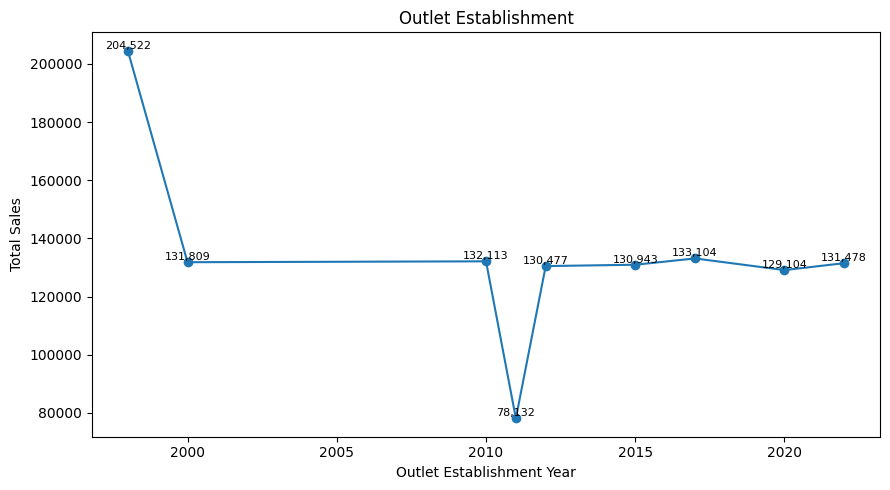

In [23]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()
ply.figure(figsize=(9,5))
ply.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle = '-')
ply.xlabel('Outlet Establishment Year')
ply.ylabel('Total Sales')
ply.title('Outlet Establishment')
for x,y in zip(sales_by_year.index, sales_by_year.values):
    ply.text(x,y,f'{y:,.0f}', ha = 'center', va = 'bottom', fontsize = 8)
ply.tight_layout()
ply.show()

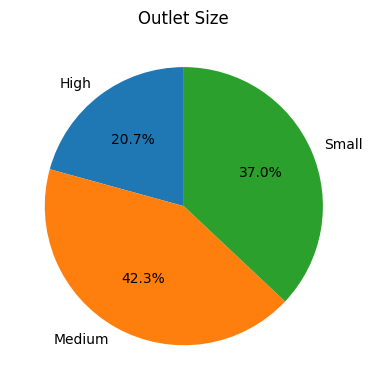

In [24]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()
ply.figure(figsize=(4,4))
ply.pie(sales_by_size, labels = sales_by_size.index, autopct='%1.1f%%', startangle=90)
ply.title('Outlet Size')
ply.tight_layout()
ply.show()

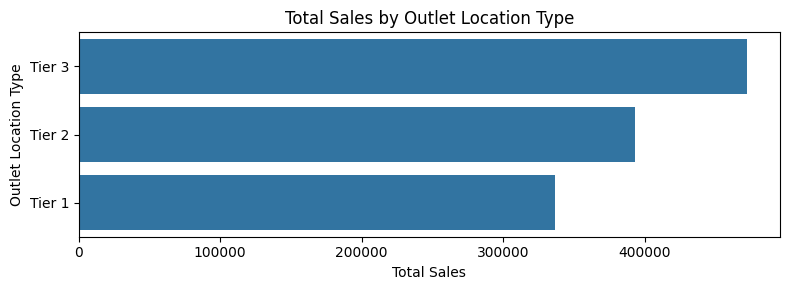

In [29]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales', ascending=False)
ply.figure(figsize=(8,3))
ax=sns.barplot(x='Sales', y='Outlet Location Type', data = sales_by_location)
ply.title('Total Sales by Outlet Location Type')
ply.xlabel('Total Sales')
ply.ylabel('Outlet Location Type')
ply.tight_layout()
ply.show()